In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('citrus.csv')

In [3]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [6]:
df.head(3)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2


In [7]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [8]:
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

<Axes: xlabel='count', ylabel='name'>

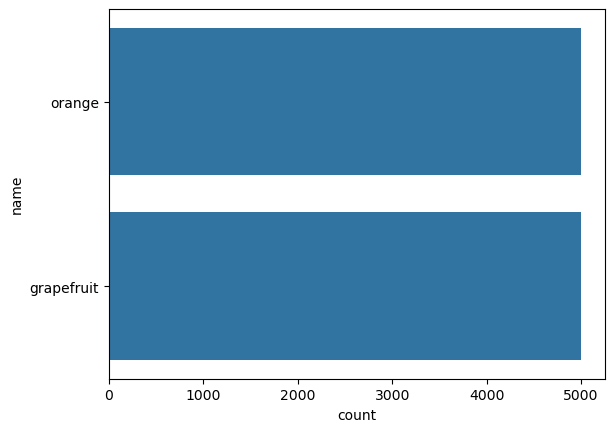

In [9]:
sns.countplot (df['name'])

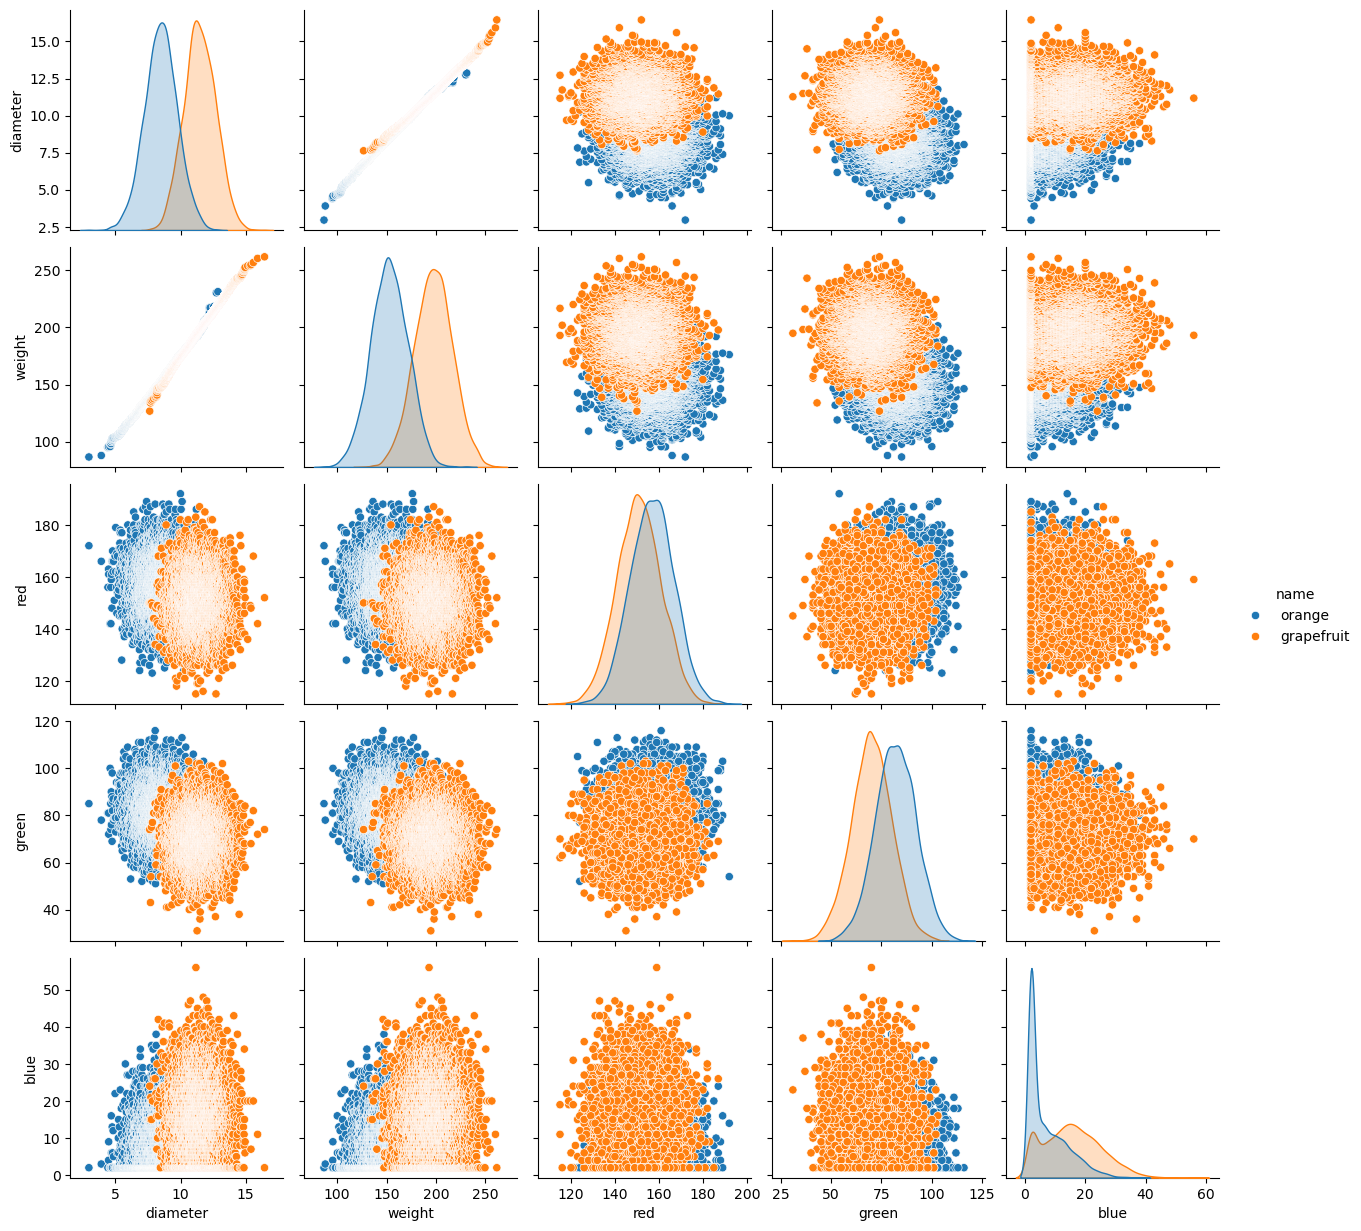

In [10]:
sns.pairplot(df,hue='name')     # hue use for targeted columns

diameter


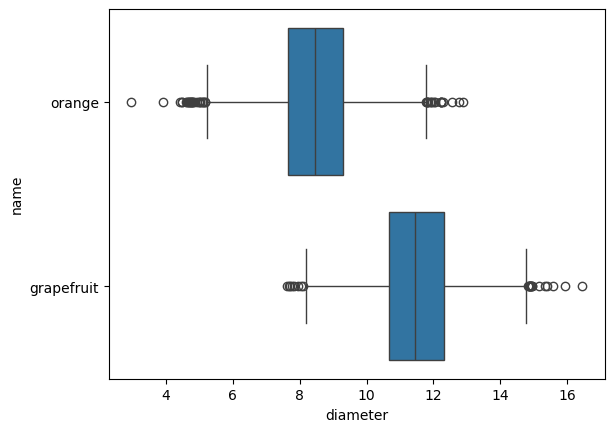

weight


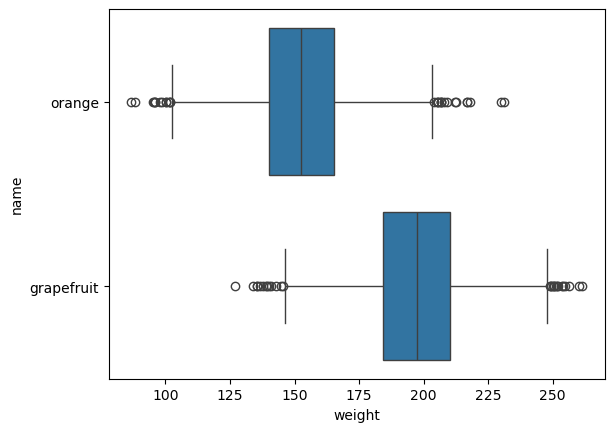

red


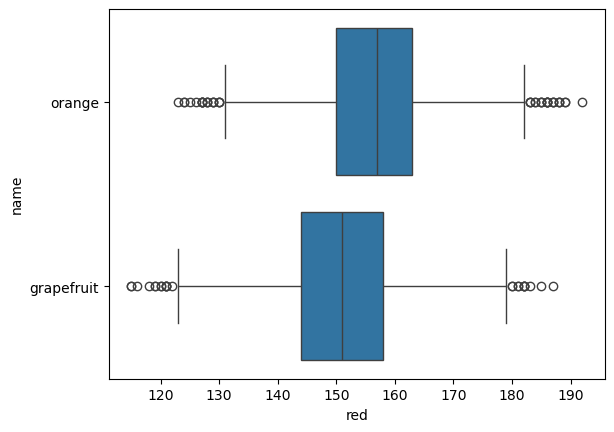

green


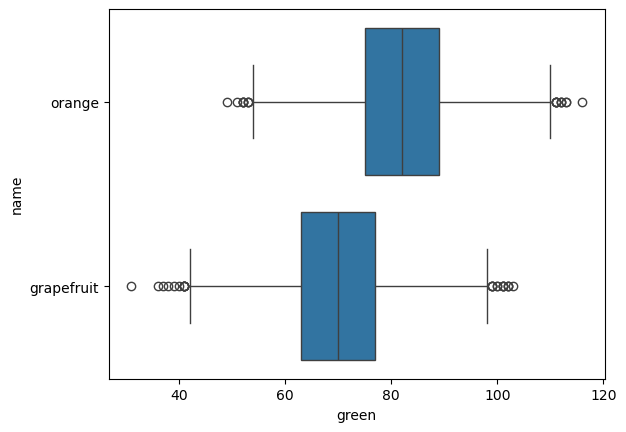

blue


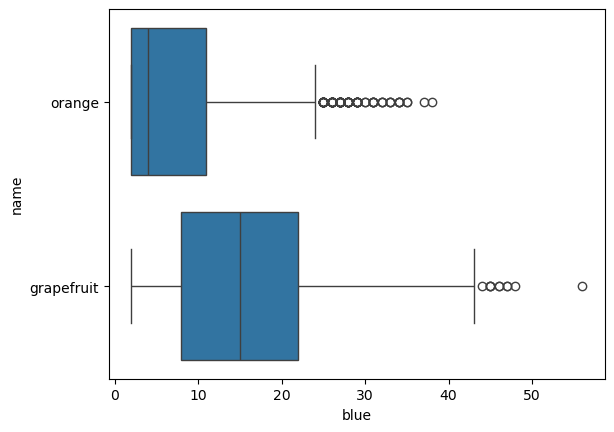

In [11]:
for i in df.select_dtypes('number').columns:
    print(i)
    sns.boxplot(data=df, x=i, y='name')
    plt.show()

In [12]:
df=pd.get_dummies(df,drop_first=True, dtype=int)

In [13]:
df.head()

,diameter,weight,red,green,blue,name_orange
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1


In [14]:
X=df.drop('name_orange',axis=1)
y=df['name_orange']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test , y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=100,stratify=y)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,ParameterGrid
from sklearn.ensemble import RandomForestClassifier

dt=DecisionTreeClassifier()
try_parameters={'criterion':['gini','entropy'],
                'max_depth':[5,10,20,None],
                'min_samples_split':[2,5,10,15],
                'min_samples_leaf':[1,5,10,15]}
grid=GridSearchCV(dt, param_grid=try_parameters,cv=5)
#for i in (list(ParameterGrid(try_parameters))):
#    print(i)
print(len((list(ParameterGrid(try_parameters)))))

grid.fit(X_train,y_train)
print('Best Parameters:',grid.best_params_)
best_dt=grid.best_estimator_
y_pred=best_dt.predict(X_test)
print(classification_report(y_test,y_pred))

128
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 15}
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1000
           1       0.95      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



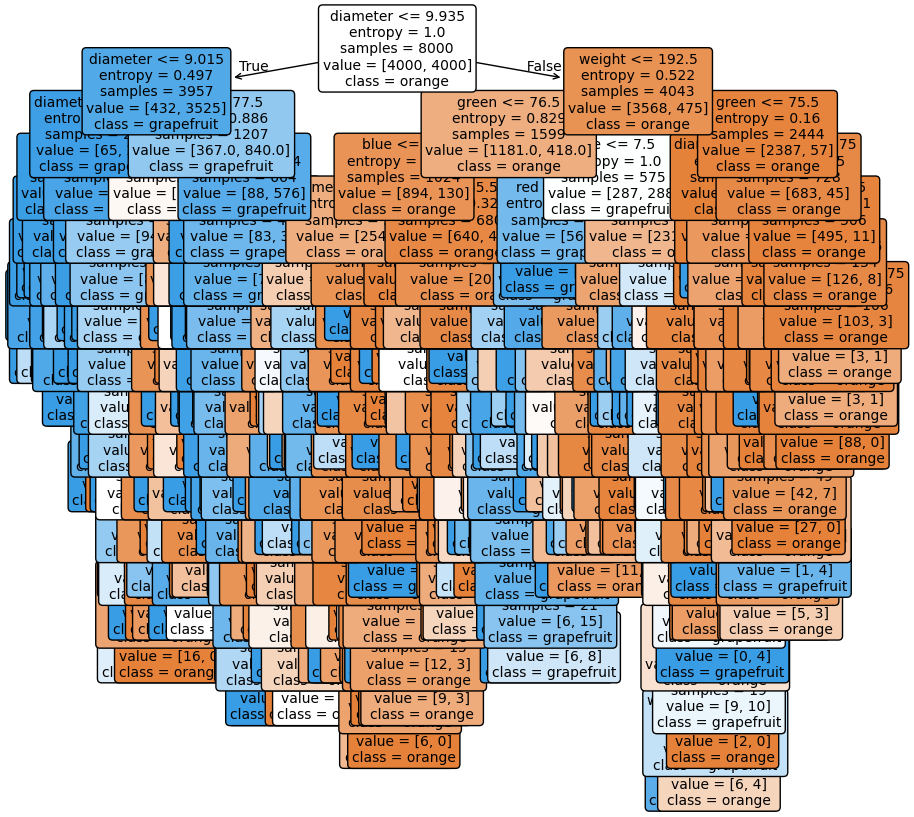

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['orange','grapefruit'],
          filled=True, rounded=True,fontsize=10)
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
dt.feature_importances_

array([0.69786057, 0.1301746 , 0.0373229 , 0.08250731, 0.05213462])

In [36]:
importance=pd.DataFrame(columns=['name','imp'])

In [38]:
importance['name']=X.columns
importance['imp']=dt.feature_importances_

In [40]:
importance[importance['imp']>0.1]

,name,imp
0,diameter,0.697861
1,weight,0.130175


In [42]:
new_df=df[['name_orange','weight','diameter']]

In [44]:
X=new_df.drop('name_orange',axis=1)
y=new_df['name_orange']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=100, stratify =y)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,ParameterGrid
from sklearn.ensemble import RandomForestClassifier

dt=DecisionTreeClassifier()
try_parameters={'criterion':['gini','entropy'],
                'max_depth':[5,10,20,None],
                'min_samples_split':[2,5,10,15],
                'min_samples_leaf':[1,5,10,15]}
grid=GridSearchCV(dt, param_grid=try_parameters,cv=5)
#for i in (list(ParameterGrid(try_parameters))):
#    print(i)
print(len((list(ParameterGrid(try_parameters)))))

grid.fit(X_train,y_train)
print('Best Parameters:',grid.best_params_)
best_dt=grid.best_estimator_
y_pred=best_dt.predict(X_test)
print(classification_report(y_test,y_pred))

128
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

